# Data Science Intern @Lets Grow More

# Author - Priyangshu Sarkar

Task 1 : Iris Flower Classification ML Project | Dataset : http://archive.ics.uci.edu/ml/datasets/Iris

--- Importing and Inspecting data


In [22]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm
from sklearn.metrics import classification_report

In [23]:
df=pd.read_csv('dataset.csv')

In [24]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [29]:
df.shape

(150, 6)

In [30]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [31]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [33]:
df = df.drop(columns = ['Id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
df = df.rename(columns = {'SepalLengthCm': 'sepal_length', 'PetalLengthCm': 'petal_length', 'SepalWidthCm': 'sepal_width' , 'PetalWidthCm': 'petal_width' })
print(df)

     sepal_length  sepal_width  petal_length  petal_width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


# --- Visualizing the data

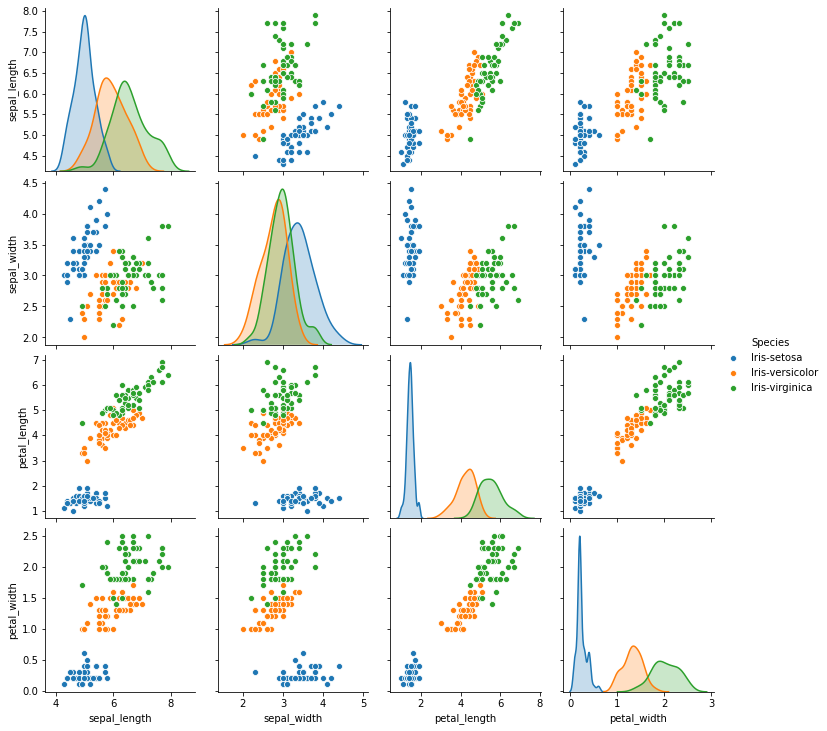

In [36]:
sns.pairplot(df, hue = "Species")
plt.show()

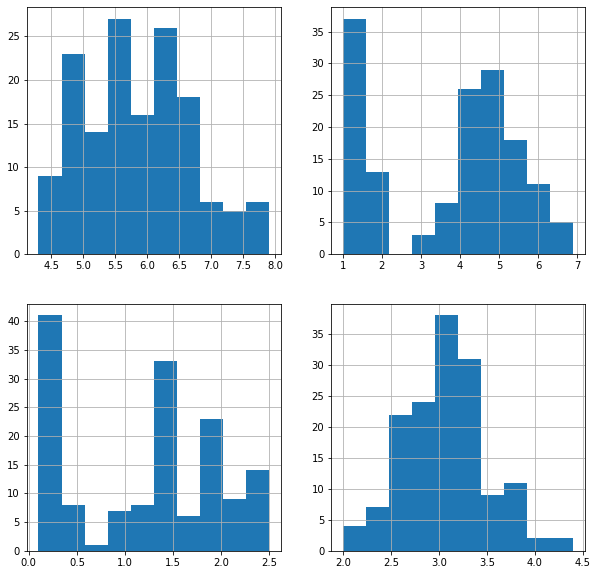

In [37]:
def histplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    df['sepal_length'].hist(ax=axes[0][0])
    df['petal_length'].hist(ax=axes[0][1])
    df['petal_width'].hist(ax=axes[1][0])
    df['sepal_width'].hist(ax=axes[1][1])
    plt.show()
    
histplots()

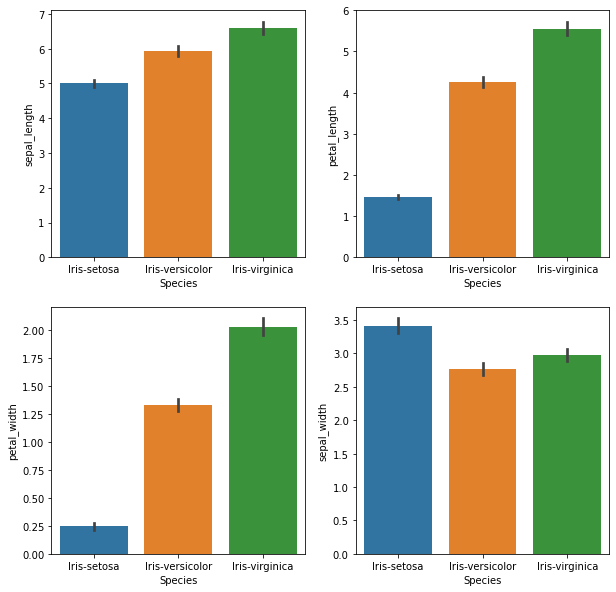

In [38]:
def barplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    sns.barplot(x=df.Species,y=df['sepal_length'],ax=axes[0][0])
    sns.barplot(x=df.Species,y=df['petal_length'],ax=axes[0][1])
    sns.barplot(x=df.Species,y=df['petal_width'],ax=axes[1][0])
    sns.barplot(x=df.Species,y=df['sepal_width'],ax=axes[1][1])
    plt.show()
    
barplots()

# --- Correlation

In [39]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


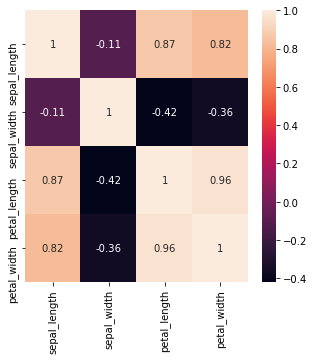

In [40]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

# Setting integer location

In [43]:
X=df.iloc[:,:-1].values

In [44]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [45]:
Y=df.iloc[:,-1].values

In [46]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Applying LabelEncoder


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Splitting the data into training dataset and testing dataset

In [48]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [49]:
X_train

array([[6.2, 2.8, 4.8, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.9, 3.6, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3. , 4.5, 1.5],
       [5.8, 4. , 1.2, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [6.1, 3. , 4.6, 1.4],
       [5.5, 2.3, 4. , 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.2, 2.9, 4.3, 1.3],
       [6.8, 3.2, 5.9, 2.3],
       [5. , 2.3, 3.3, 1. ],
       [4.8, 3.4, 1.6, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.2, 3.4, 1.4, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [5.1, 3.5, 1.4, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [6.2, 3.4, 5.4, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [5.4, 3.4, 1.7, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [6.3, 3.4, 5.6, 2.4],
       [7.6, 3. , 6.6, 2.1],
       [6. , 2.2, 5. , 1.5],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.8, 4.1, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [7.7, 3

In [51]:
y_train

array([2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1,
       0, 2, 1, 0, 2, 1, 0, 0, 1, 0], dtype=int64)

In [52]:
X_test

array([[4.6, 3.4, 1.4, 0.3],
       [4.6, 3.1, 1.5, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [4.8, 3. , 1.4, 0.1],
       [4.8, 3.4, 1.9, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [5. , 3. , 1.6, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [4.8, 3. , 1.4, 0.3],
       [5.3, 3.7, 1.5, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6. , 3.4, 4.5, 1.6],
       [6.5, 2.8, 4.6, 1.5],
       [4.5, 2.3, 1.3, 0.3],
       [5.7, 2.9, 4.2, 1.3],
       [6.7, 3.3, 5.7, 2.5],
       [5.5, 2.5, 4. , 1.3],
       [6.7, 3. , 5. , 1.7],
       [6.4, 2.9, 4.3, 1.3],
       [6.4, 3.2, 5.3, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [6.3, 2.3, 4.4, 1.3],
       [4.7, 3.2, 1.6, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5.1, 3.8, 1.9, 0.4],
       [7.2, 3.2, 6. , 1.8]])

In [53]:
y_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2], dtype=int64)

In [54]:
len(X_train)

120

In [56]:
len(y_train)

120

In [57]:
len(X_test)

30

In [58]:
len(y_test)

30

# --- supervised ML algorithms

# Linear Regression

In [60]:

model = LinearRegression()

model.fit(X_train,y_train)


LinearRegression()

In [61]:
y_pred = model.predict(X_test)

sc_lr = round(model.score(X_test, y_test) * 100 , 2)

print("Accuracy: ", str(sc_lr) , " %" )

Accuracy:  93.71  %


# Logistic Regression

In [63]:
model2 = LogisticRegression()

model2.fit(X_train,y_train)

LogisticRegression()

In [64]:
sc_logr = round(model2.score(X_test, y_test) * 100,2)

print("Accuracy: ", str(sc_logr) ,  " %")

Accuracy:  96.67  %


# Naive Bayes

In [65]:
nb = GaussianNB()

nb.fit(X_train,y_train)


GaussianNB()

In [67]:
y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)

In [68]:
print("Accuracy: "+str(score_nb)+" %")

print(classification_report(y_test, y_pred_nb))

Accuracy: 96.67 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# KNN Classifier

In [69]:
model3 = KNeighborsClassifier()

model3.fit(X_train,y_train)


KNeighborsClassifier()

In [71]:
sc_knn = round(model3.score(X_test, y_test) * 100,2)

print("Accuracy: ", str(sc_knn) , " %")

Accuracy:  100.0  %


# Decision Tree Classifier

In [72]:
model4 = DecisionTreeClassifier()

model4.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
sc_knn = round(model3.score(X_test, y_test) * 100,2)

print("Accuracy: ", str(sc_knn) , " %")

Accuracy:  100.0  %


# SVM

In [76]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

SVC(kernel='linear')

In [77]:
y_pred_svm = sv.predict(X_test)

sc_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

In [78]:
print("Accuracy: "+ str(sc_svm) +" %")

print(classification_report(y_test, y_pred_svm))

Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# --- comparison Between all the classifier 

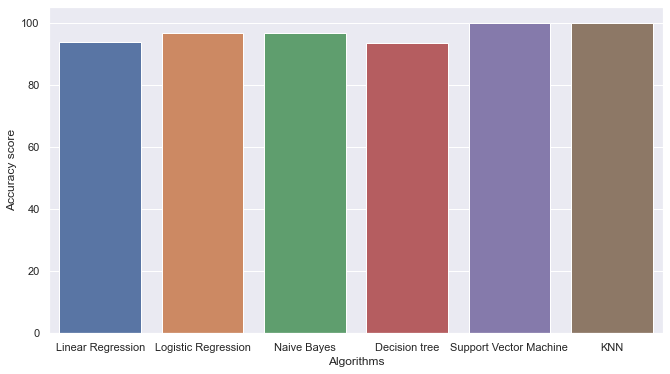

In [79]:
scores_plt = [sc_lr , sc_logr , score_nb, sc_dt, sc_svm, sc_knn]
algorithms = ["Linear Regression","Logistic Regression","Naive Bayes","Decision tree","Support Vector Machine", "KNN"]
sns.set(rc={'figure.figsize':(11,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores_plt)